# 1.importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# 2.Data Aquisation 

In [2]:
#Input movies dataset
movies = pd.read_csv(r"./movies.dat", sep='::', engine='python', encoding='latin1')
movies.columns =['MovieID', 'Title', 'Genres']
movies.dropna(inplace=True)
movies.head()

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [3]:
#Input ratings dataset
ratings = pd.read_csv(r"./ratings.dat",sep='::', engine='python')
ratings.columns =['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings.dropna(inplace=True)

#Read the sample ratings dataset
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [4]:
#Input users dataset
users = pd.read_csv(r"./users.dat",sep='::',engine='python')
users.columns =['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users.dropna(inplace=True)

#Read the sample users dataset
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [5]:
total_data=pd.concat([movies,ratings,users],axis=1)
total_data.head()

,MovieID,Title,Genres,UserID,MovieID,Rating,Timestamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


# 3. Analysing the data

In [6]:
total_data.shape

(1000208, 12)

In [7]:
total_data.value_counts('Rating')

Rating
4    348971
3    261197
5    226309
2    107557
1     56174
dtype: int64

In [8]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000208 entries, 0 to 1000207
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MovieID     3882 non-null     float64
 1   Title       3882 non-null     object 
 2   Genres      3882 non-null     object 
 3   UserID      1000208 non-null  int64  
 4   MovieID     1000208 non-null  int64  
 5   Rating      1000208 non-null  int64  
 6   Timestamp   1000208 non-null  int64  
 7   UserID      6039 non-null     float64
 8   Gender      6039 non-null     object 
 9   Age         6039 non-null     float64
 10  Occupation  6039 non-null     float64
 11  Zip-code    6039 non-null     object 
dtypes: float64(4), int64(4), object(4)
memory usage: 91.6+ MB


In [9]:
total_data.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'MovieID', 'Rating',
       'Timestamp', 'UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [10]:
total_data.dtypes

MovieID       float64
Title          object
Genres         object
UserID          int64
MovieID         int64
Rating          int64
Timestamp       int64
UserID        float64
Gender         object
Age           float64
Occupation    float64
Zip-code       object
dtype: object

In [11]:
total_data.corr()

C:\Users\srira\AppData\Local\Temp\ipykernel_15560\354577074.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_data.corr()


,MovieID,UserID,MovieID,Rating,Timestamp,UserID,Age,Occupation
MovieID,1.000000,0.991045,0.008523,-0.152805,0.072239,0.999944,-0.005678,0.003494
UserID,0.991045,1.000000,-0.017740,0.012305,-0.490383,0.996038,0.006483,-0.016237
MovieID,0.008523,-0.017740,1.000000,-0.064041,0.041632,0.037809,-0.002472,0.024314
Rating,-0.152805,0.012305,-0.064041,1.000000,-0.026771,0.004246,-0.004449,0.003615
Timestamp,0.072239,-0.490383,0.041632,-0.026771,1.000000,0.128380,-0.002312,-0.028189
UserID,0.999944,0.996038,0.037809,0.004246,0.128380,1.000000,0.005058,-0.018040
Age,-0.005678,0.006483,-0.002472,-0.004449,-0.002312,0.005058,1.000000,0.065350
Occupation,0.003494,-0.016237,0.024314,0.003615,-0.028189,-0.018040,0.065350,1.000000


In [12]:
total_data.isnull().sum()

MovieID       996326
Title         996326
Genres        996326
UserID             0
MovieID            0
Rating             0
Timestamp          0
UserID        994169
Gender        994169
Age           994169
Occupation    994169
Zip-code      994169
dtype: int64

# 4. Data Visualization

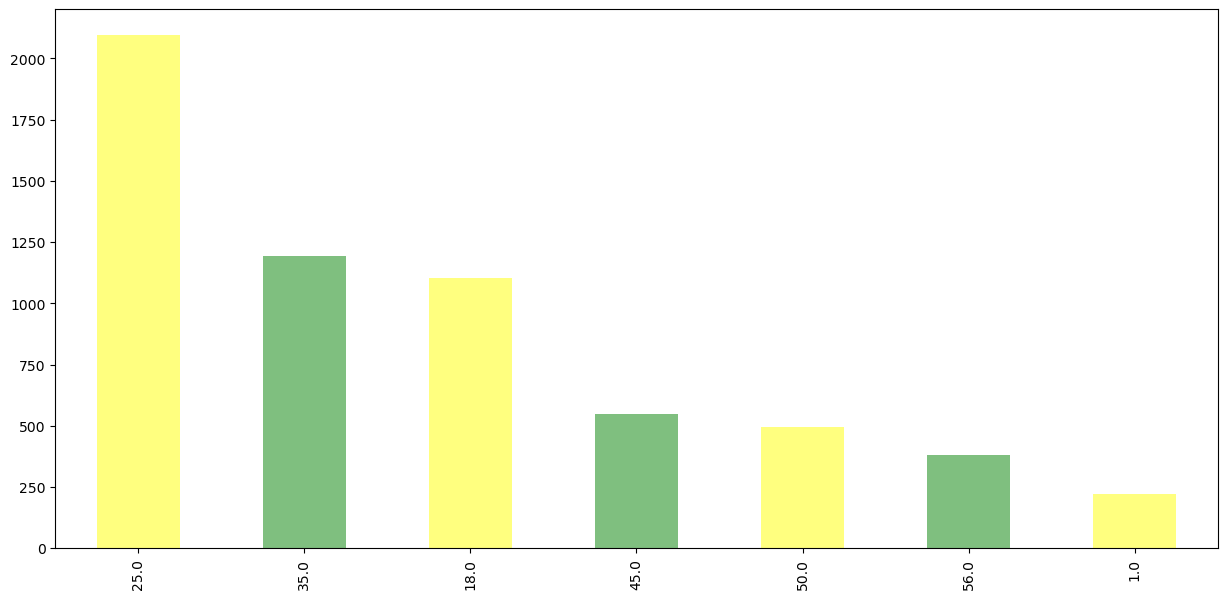

In [13]:
total_data['Age'].value_counts().plot(kind='bar', color= ['yellow', 'green'],alpha=0.5,figsize=(15,7))
plt.show()

Axes(0.125,0.11;0.775x0.77)


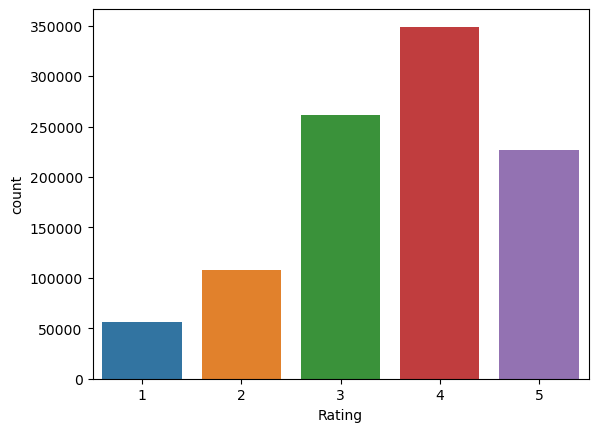

In [14]:
print(sns.countplot(data=total_data,x='Rating'))

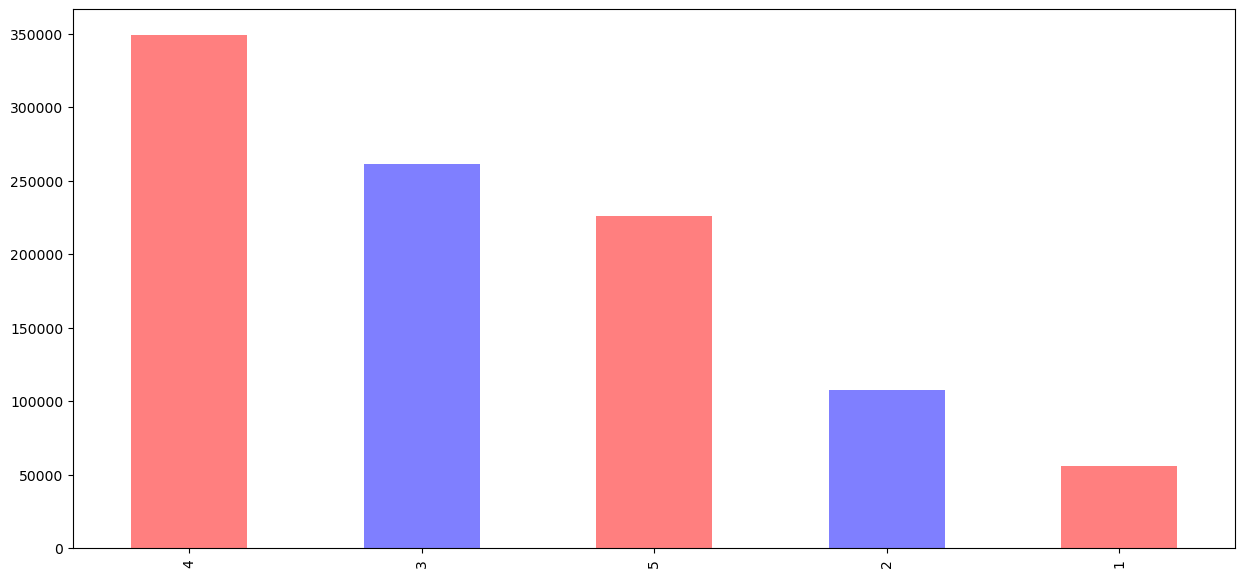

In [15]:
total_data['Rating'].value_counts().plot(kind='bar', color=['red', 'blue'],alpha=0.5,figsize=(15,7))
plt.show()

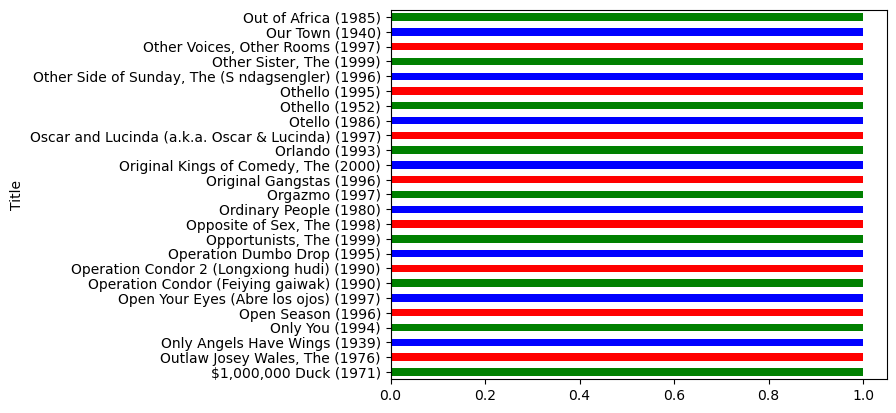

In [16]:
res = total_data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
res.plot(kind="barh", color = ['green', 'red', 'blue'])
plt.show()

# 5.splitting the data

In [17]:
#First 500 extracted records
first_500 = total_data[500:]
first_500.dropna(inplace=True)
first_500

C:\Users\srira\AppData\Local\Temp\ipykernel_15560\285251368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_500.dropna(inplace=True)


,MovieID,Title,Genres,UserID,MovieID,Rating,Timestamp,UserID,Gender,Age,Occupation,Zip-code
500,505.0,North (1994),Comedy,6,17,4,978236383,502.0,M,35.0,6.0,55126
501,506.0,Orlando (1993),Drama,6,3699,4,978236567,503.0,M,35.0,11.0,73120
502,507.0,"Perfect World, A (1993)",Action|Drama,6,1441,4,978236383,504.0,M,25.0,2.0,17003
503,508.0,Philadelphia (1993),Drama,6,1088,5,978236670,505.0,M,35.0,17.0,37815
504,509.0,"Piano, The (1993)",Drama|Romance,6,912,4,978236122,506.0,M,25.0,16.0,55103-1006
...,...,...,...,...,...,...,...,...,...,...,...,...
3877,3948.0,Meet the Parents (2000),Comedy,28,334,4,978125960,3879.0,M,25.0,3.0,83687
3878,3949.0,Requiem for a Dream (2000),Drama,28,266,2,978982323,3880.0,M,25.0,7.0,54942
3879,3950.0,Tigerland (2000),Drama,28,2174,3,978126491,3881.0,M,18.0,2.0,44515
3880,3951.0,Two Family House (2000),Drama,28,912,5,978985294,3882.0,M,56.0,14.0,55337


In [18]:
#Use the following features:movie id,age,occupation
x = first_500[['MovieID','Age','Occupation']].values

#Use rating as label
y = first_500[['Rating']].values

In [19]:
#Create train and test data set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

# 6.Building models

# logistic regression

In [20]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
Y_pred = lr.predict(x_test)
lrAcc = lr.score(x_train, y_train) 
lrAcc

C:\Users\srira\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srira\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.33818984547461367

In [21]:
from sklearn. metrics import classification_report
print(classification_report (y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        51
           2       0.14      0.01      0.02       120
           3       0.30      0.32      0.31       313
           4       0.38      0.74      0.50       394
           5       0.00      0.00      0.00       239

    accuracy                           0.35      1117
   macro avg       0.16      0.21      0.16      1117
weighted avg       0.23      0.35      0.26      1117



C:\Users\srira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K Nearest Neighbors Classifier

In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
knnAcc = round(knn.score(x_train, y_train) * 100, 2)
knnAcc

C:\Users\srira\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


60.53

In [23]:
from sklearn. metrics import classification_report
print(classification_report (y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.04      0.08      0.05        51
           2       0.14      0.22      0.17       120
           3       0.29      0.33      0.31       313
           4       0.41      0.30      0.35       394
           5       0.34      0.26      0.30       239

    accuracy                           0.28      1117
   macro avg       0.24      0.24      0.23      1117
weighted avg       0.32      0.28      0.29      1117



# Decision Tree Classifier

In [24]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
Y_pred = dt.predict(x_test)
dtAcc = dt.score(x_train, y_train)
dtAcc

1.0

In [25]:
from sklearn. metrics import classification_report
print(classification_report (y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.10      0.10      0.10        51
           2       0.21      0.21      0.21       120
           3       0.31      0.33      0.32       313
           4       0.37      0.36      0.37       394
           5       0.32      0.32      0.32       239

    accuracy                           0.32      1117
   macro avg       0.26      0.26      0.26      1117
weighted avg       0.32      0.32      0.32      1117

